In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as XGB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import math
%matplotlib inline


In [5]:
def create_total_sf(df):
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] 
    

In [6]:
def standardize_numerical_features(df,feature_list):
    for feature in feature_list:
        feature_series= df.loc[:,feature]
        df.loc[:,feature] = (feature_series - feature_series.mean())/feature_series.std()

In [7]:
def get_dfs_for_prediction(features, train,test, all_data):
    #creating matrices for sklearn:
    y_train = train.SalePrice
    y_test = test.SalePrice
    y_all_data = all_data.SalePrice
    X_train = train[features]
    X_test = test[features]
    X_all_data = all_data[features]
    return y_train, y_test, y_all_data, X_train, X_test, X_all_data


In [82]:
train = pd.read_csv('our_train.csv')
test = pd.read_csv('our_validation.csv')
all_data = train.append(test)


create_total_sf(train)
standardize_numerical_features(train,['TotalSF',"GrLivArea"])
create_total_sf(test)
standardize_numerical_features(test,['TotalSF',"GrLivArea"])
create_total_sf(all_data)
standardize_numerical_features(all_data,['TotalSF',"GrLivArea"])


parameters = {}
features = ['TotalSF',"GrLivArea"]


y_train, y_test, y_all_data, X_train, X_test, X_all_data = get_dfs_for_prediction(features, train, test, all_data)

target ="SalePrice"
estimator = XGB.XGBRegressor(seed=42, max_depth=1, n_estimators=100, learning_rate = 0.15)
model = estimator.fit(X_train,np.log(y_train))
print math.sqrt((mean_squared_error(np.log(y_test), model.predict(X_test))))
print (model)



0.221550752966
XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.15, max_delta_step=0, max_depth=1,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)


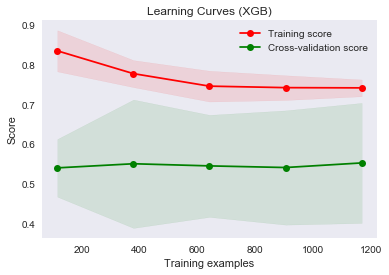

In [79]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

title = "Learning Curves (XGB)"
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(
    XGB.XGBRegressor(seed=42, max_depth=1,n_estimators=100, learning_rate = 0.15), X_all_data, y_all_data, cv=cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

